In [ ]:
import pandas as pd
data = pd.read_csv("vispremv.dat", sep=" ")

In [ ]:
quali_columns = ["SEXEQ","FAMIQ","PCSPQ"]
quanti_columns = ["RELAT","AGER","OPGNBL","MOYRVL","TAVEPL","ENDETL","GAGETL","GAGECL","GAGEML","KVUNB","QSMOY","QCREDL","DMVTPL","BOPPNL","FACANL","LGAGTL","VIENB","VIEMTL","UEMNB","XLGNB","XLGMTL","YLVNB","YLVMTL","ROCNB","NPTAG","ITAVCL","HAVEFL","JNBJDL"]
target_var = "CARVP"

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
preprocessor = make_column_transformer(
    (OneHotEncoder(), quali_columns),
    (StandardScaler(), quanti_columns)
)

In [ ]:
target = data["CARVP"]
data_model = data.drop(columns='CARVP')
X_train, X_test, Y_train, Y_test = train_test_split(data_model, target, stratify=target, random_state=7, test_size=.2)

X_train_porteurs = X_train.loc[Y_train=="Coui"]
Y_train_porteurs = Y_train.loc[Y_train=="Coui"]
X_train_pondere = pd.concat([X_train,X_train_porteurs,X_train_porteurs])
Y_train_pondere = pd.concat([Y_train,Y_train_porteurs,Y_train_porteurs])

print(Y_train.value_counts(normalize=True))
print(Y_train_pondere.value_counts(normalize=True))
print(Y_test.value_counts(normalize=True))

Cnon    0.664706
Coui    0.335294
Name: CARVP, dtype: float64
Coui    0.602113
Cnon    0.397887
Name: CARVP, dtype: float64
Cnon    0.661972
Coui    0.338028
Name: CARVP, dtype: float64


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


precision :  0.8353745753620597 , recall :  0.8695330969267139 , precision_recall :  0.8521116461787811 , F1 macro :  0.8420759962928638 , F1 micro :  0.8497652582159625


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

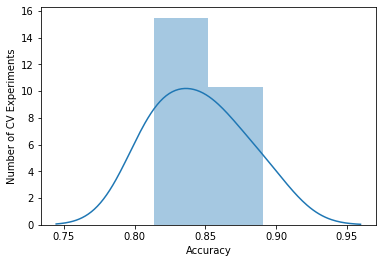

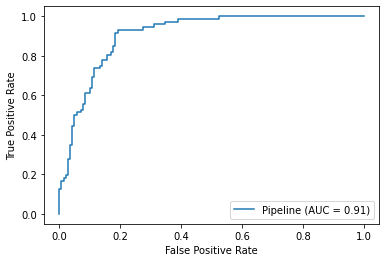

Confusion matrix, without normalization
[[114  27]
 [  5  67]]
Normalized confusion matrix
[[0.80851064 0.19148936]
 [0.06944444 0.93055556]]


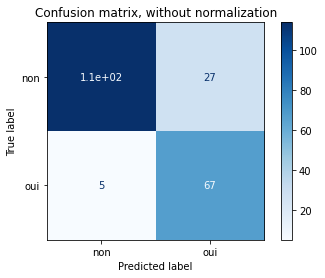

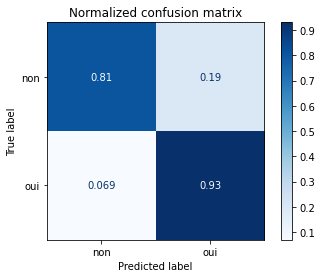

In [ ]:
from matplotlib import pyplot as plt

#SVM
from sklearn import svm
#Pipeline
pipeline = make_pipeline(preprocessor, svm.LinearSVC())
pipeline
pipeline.fit(X_train_pondere, Y_train_pondere)

#F1 score
from sklearn.metrics import f1_score, precision_score, recall_score
Y_pred = pipeline.predict(X_test)
fmeasure1 = f1_score(Y_test, Y_pred, average="macro")
fmeasure2 = f1_score(Y_test, Y_pred, average="micro")
precision = precision_score(Y_test, Y_pred, average="macro")
recall = recall_score(Y_test, Y_pred, average="macro")

print("precision : ", precision, ", recall : ", recall, ", precision_recall : ",2*(precision*recall)/(precision + recall), ", F1 macro : ",fmeasure1, ", F1 micro : ", fmeasure2)

#Crossvalidation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X_train_pondere, Y_train_pondere, cv=5)
import seaborn as sns
sns.distplot(scores)
plt.xlabel('Accuracy')
plt.ylabel('Number of CV Experiments')
plt.show()



# ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(pipeline, X_test, Y_test)
plt.show()

# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(pipeline, X_test, Y_test,
                                 display_labels=["non","oui"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)    
    print(title)
    print(disp.confusion_matrix)


precision :  0.827590811965812 , recall :  0.8624408983451537 , precision_recall :  0.8446565339329171 , F1 macro :  0.8329180509413068 , F1 micro :  0.8403755868544601


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


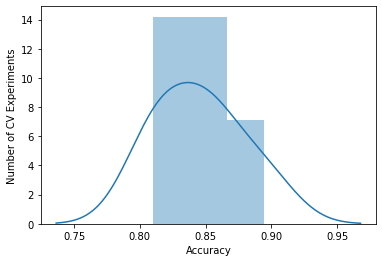

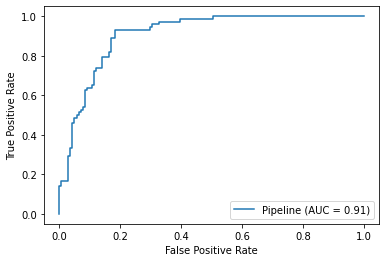

Confusion matrix, without normalization
[[112  29]
 [  5  67]]
Normalized confusion matrix
[[0.79432624 0.20567376]
 [0.06944444 0.93055556]]


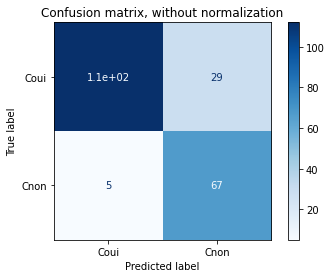

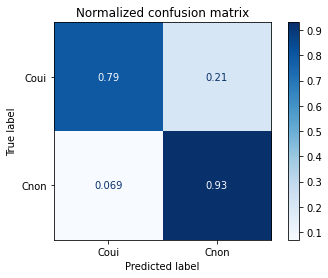

In [ ]:
from matplotlib import pyplot as plt

#LogisticRegression
from sklearn.linear_model import LogisticRegression
#Pipeline
pipeline = make_pipeline(preprocessor, LogisticRegression())
pipeline
pipeline.fit(X_train_pondere, Y_train_pondere)

#F1 score
from sklearn.metrics import f1_score, precision_score, recall_score
Y_pred = pipeline.predict(X_test)
fmeasure1 = f1_score(Y_test, Y_pred, average="macro")
fmeasure2 = f1_score(Y_test, Y_pred, average="micro")
precision = precision_score(Y_test, Y_pred, average="macro")
recall = recall_score(Y_test, Y_pred, average="macro")

print("precision : ", precision, ", recall : ", recall, ", precision_recall : ",2*(precision*recall)/(precision + recall), ", F1 macro : ",fmeasure1, ", F1 micro : ", fmeasure2)

#Crossvalidation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X_train_pondere, Y_train_pondere, cv=5)
import seaborn as sns
sns.distplot(scores)
plt.xlabel('Accuracy')
plt.ylabel('Number of CV Experiments')
plt.show()



# ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(pipeline, X_test, Y_test)
plt.show()

# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(pipeline, X_test, Y_test,
                                 display_labels=["Coui","Cnon"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)    
    print(title)
    print(disp.confusion_matrix)

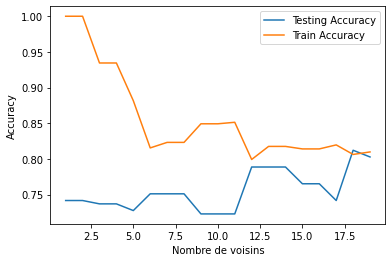

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


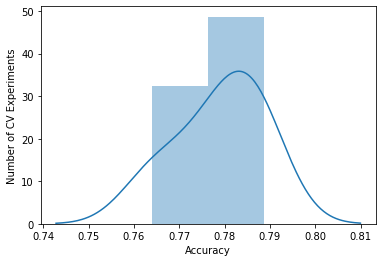

precision_recall :  0.7382312928076026 F1 macro :  0.7340823970037453 F1 micro :  0.7511737089201878


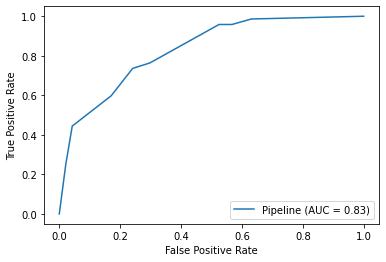

Confusion matrix, without normalization
[[107  34]
 [ 19  53]]
Normalized confusion matrix
[[0.75886525 0.24113475]
 [0.26388889 0.73611111]]


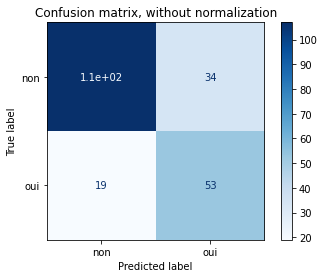

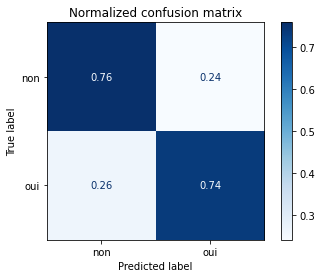

In [ ]:
from matplotlib import pyplot as plt

#K plus proches voisins pondéré
from sklearn.neighbors import KNeighborsClassifier

#Choix de nombre de voisins optimal = 8
neighbors=np.arange(1,20)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    pipeline = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=k))
    pipeline.fit(X_train_pondere, Y_train_pondere)
    train_accuracy[i]=pipeline.score(X_train_pondere,Y_train_pondere)
    test_accuracy[i]=pipeline.score(X_test,Y_test)
    
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Train Accuracy')
plt.legend()
plt.xlabel('Nombre de voisins')
plt.ylabel('Accuracy')
plt.show()

#Pipeline
pipeline = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=8))
pipeline
pipeline.fit(X_train_pondere, Y_train_pondere)

#F1 score
from sklearn.metrics import f1_score, precision_score, recall_score
Y_pred = pipeline.predict(X_test)
fmeasure1 = f1_score(Y_test, Y_pred, average="macro")
fmeasure2 = f1_score(Y_test, Y_pred, average="micro")
precision = precision_score(Y_test, Y_pred, average="macro")
recall = recall_score(Y_test, Y_pred, average="macro")

#Crossvalidation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X_train_pondere, Y_train_pondere, cv=5)
import seaborn as sns
sns.distplot(scores)
plt.xlabel('Accuracy')
plt.ylabel('Number of CV Experiments')
plt.show()


print("precision_recall : ",2*(precision*recall)/(precision + recall), "F1 macro : ",fmeasure1, "F1 micro : ", fmeasure2)

# ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(pipeline, X_test, Y_test)
plt.show()

# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(pipeline, X_test, Y_test,
                                 display_labels=["non","oui"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)    
    print(title)
    print(disp.confusion_matrix)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


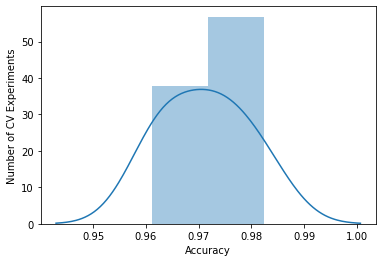

precision_recall :  0.9055851063829787 F1 macro :  0.9055851063829787 F1 micro :  0.9154929577464789


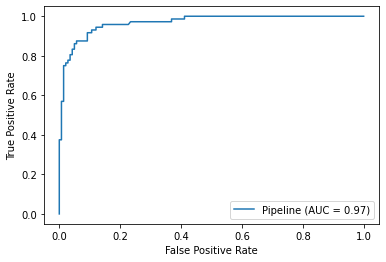

Confusion matrix, without normalization
[[132   9]
 [  9  63]]
Normalized confusion matrix
[[0.93617021 0.06382979]
 [0.125      0.875     ]]


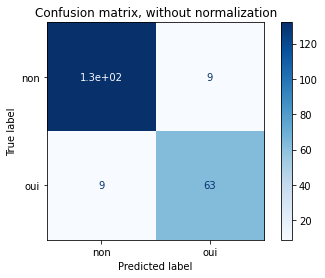

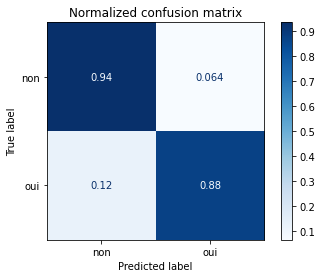

In [ ]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

#Random forest pondéré
from sklearn.ensemble import RandomForestClassifier
#Pipeline
pipeline = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=1000, max_depth=1000, max_features=31))
#pipeline = make_pipeline(preprocessor, PCA(n_components='mle',svd_solver='full'), RandomForestClassifier(n_estimators=1000, max_depth=1000, max_features=31))
pipeline
pipeline.fit(X_train_pondere, Y_train_pondere)

#F1 score
from sklearn.metrics import f1_score, precision_score, recall_score
Y_pred = pipeline.predict(X_test)
fmeasure1 = f1_score(Y_test, Y_pred, average="macro")
fmeasure2 = f1_score(Y_test, Y_pred, average="micro")
precision = precision_score(Y_test, Y_pred, average="macro")
recall = recall_score(Y_test, Y_pred, average="macro")

#Crossvalidation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X_train_pondere, Y_train_pondere, cv=5)
import seaborn as sns
sns.distplot(scores)
plt.xlabel('Accuracy')
plt.ylabel('Number of CV Experiments')
plt.show()


print("precision_recall : ",2*(precision*recall)/(precision + recall), "F1 macro : ",fmeasure1, "F1 micro : ", fmeasure2)

# ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(pipeline, X_test, Y_test)
plt.show()

# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(pipeline, X_test, Y_test,
                                 display_labels=["non","oui"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)    
    print(title)
    print(disp.confusion_matrix)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


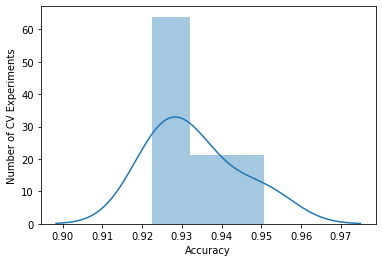

precision_recall :  0.8028036240915837 F1 macro :  0.8011204481792717 F1 micro :  0.8169014084507042
Confusion matrix, without normalization
[[117  24]
 [ 15  57]]
Normalized confusion matrix
[[0.82978723 0.17021277]
 [0.20833333 0.79166667]]


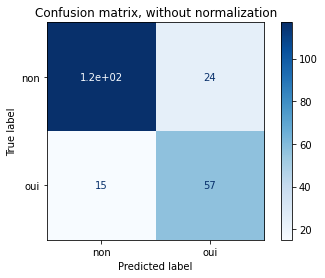

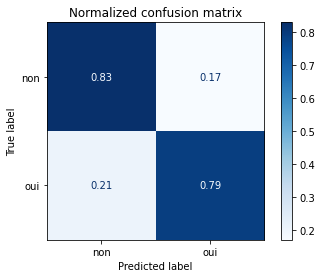

In [ ]:
#Neural Network pondere

from sklearn.decomposition import PCA

target = data["CARVP"]
data_model = data.drop(columns='CARVP')
data_modelNN=data.drop(columns=['CARVP',"SEXEQ","FAMIQ","PCSPQ"])

#quali_columns = ["SEXEQ","FAMIQ","PCSPQ"]
#quanti_columns = ["RELAT","AGER","OPGNBL","MOYRVL","TAVEPL","ENDETL","GAGETL","GAGECL","GAGEML","KVUNB","QSMOY","QCREDL","DMVTPL","BOPPNL","FACANL","LGAGTL","VIENB","VIEMTL","UEMNB","XLGNB","XLGMTL","YLVNB","YLVMTL","ROCNB","NPTAG","ITAVCL","HAVEFL","JNBJDL"]
target_var = "CARVP"

X_train, X_test, Y_train, Y_test = train_test_split(data_model, target, stratify=target, random_state=7, test_size=.2)
#X_train, X_test, Y_train, Y_test = train_test_split(data_modelNN, target, stratify=target, random_state=7, test_size=.2)

preprocessor = make_column_transformer(
    (OneHotEncoder(), quali_columns),
    (StandardScaler(), quanti_columns)
)

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=0,learning_rate_init=0.00001,
                    hidden_layer_sizes=(100, 100),
                    max_iter=100000000, random_state=1)



pipeline = make_pipeline(preprocessor,PCA(n_components='mle',svd_solver='full'), clf)
pipeline.fit(X_train_pondere, Y_train_pondere)

#F1 score
from sklearn.metrics import f1_score, precision_score, recall_score
Y_pred = pipeline.predict(X_test)
fmeasure1 = f1_score(Y_test, Y_pred, average="macro")
fmeasure2 = f1_score(Y_test, Y_pred, average="micro")
precision = precision_score(Y_test, Y_pred, average="macro")
recall = recall_score(Y_test, Y_pred, average="macro")

#Cross validation
scores = cross_val_score(pipeline, X_train_pondere, Y_train_pondere, cv=5)
import seaborn as sns
sns.distplot(scores)
plt.xlabel('Accuracy')
plt.ylabel('Number of CV Experiments')
plt.show()

print("precision_recall : ",2*(precision*recall)/(precision + recall), "F1 macro : ",fmeasure1, "F1 micro : ", fmeasure2)

# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(pipeline, X_test, Y_test,
                                 display_labels=["non","oui"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)    
    print(title)
    print(disp.confusion_matrix)



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


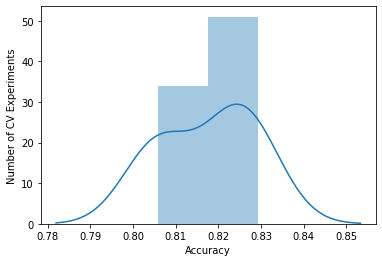

precision_recall :  0.7856882616571215 F1 macro :  0.7856669530003682 F1 micro :  0.8075117370892019
Confusion matrix, without normalization
[[120  21]
 [ 20  52]]
Normalized confusion matrix
[[0.85106383 0.14893617]
 [0.27777778 0.72222222]]


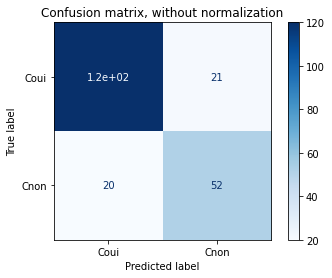

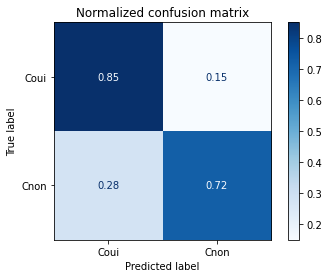

In [ ]:
#Neural Network classique

target = data["CARVP"]
data_model = data.drop(columns='CARVP')
data_modelNN=data.drop(columns=['CARVP',"SEXEQ","FAMIQ","PCSPQ"])

#quali_columns = ["SEXEQ","FAMIQ","PCSPQ"]
#quanti_columns = ["RELAT","AGER","OPGNBL","MOYRVL","TAVEPL","ENDETL","GAGETL","GAGECL","GAGEML","KVUNB","QSMOY","QCREDL","DMVTPL","BOPPNL","FACANL","LGAGTL","VIENB","VIEMTL","UEMNB","XLGNB","XLGMTL","YLVNB","YLVMTL","ROCNB","NPTAG","ITAVCL","HAVEFL","JNBJDL"]
target_var = "CARVP"

X_train, X_test, Y_train, Y_test = train_test_split(data_model, target, stratify=target, random_state=7, test_size=.2)
#X_train, X_test, Y_train, Y_test = train_test_split(data_modelNN, target, stratify=target, random_state=7, test_size=.2)

preprocessor = make_column_transformer(
    (OneHotEncoder(), quali_columns),
    (StandardScaler(), quanti_columns)
)

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=0,learning_rate_init=0.00001,
                    hidden_layer_sizes=(100, 100),
                    max_iter=100000000, random_state=1)

pipeline = make_pipeline(preprocessor, clf)
pipeline.fit(X_train, Y_train)

#F1 score
from sklearn.metrics import f1_score, precision_score, recall_score
Y_pred = pipeline.predict(X_test)
fmeasure1 = f1_score(Y_test, Y_pred, average="macro")
fmeasure2 = f1_score(Y_test, Y_pred, average="micro")
precision = precision_score(Y_test, Y_pred, average="macro")
recall = recall_score(Y_test, Y_pred, average="macro")

#Cross validation
scores = cross_val_score(pipeline, X_train, Y_train, cv=5)
import seaborn as sns
sns.distplot(scores)
plt.xlabel('Accuracy')
plt.ylabel('Number of CV Experiments')
plt.show()

print("precision_recall : ",2*(precision*recall)/(precision + recall), "F1 macro : ",fmeasure1, "F1 micro : ", fmeasure2)

# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(pipeline, X_test, Y_test,
                                 display_labels=["Coui","Cnon"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)    
    print(title)
    print(disp.confusion_matrix)